# Understanding RNN

# What we use till now
Neural network that we use till now like dense, convnets have no memory.

They were independent and no state were kept it between there input.

With such network, to process sequence or series data we have to show entire data at once like we did with imdb.

An entire movie review was transformed into a single large vector and processed in one go. Such networks are called
feedforward networks.

# Recurrent neural network

A recurrent neural network (RNN) processes sequences and keep them in memmory

It works in batches

We use it on sequentioal data where future is dependent on past



# SimpleRNN

SimpleRNN takes inputs of shape (batch_size, timesteps, input_features), rather than (timesteps,input_features)

SimpleRNN can be run in two different modes:
1. (a 3D tensor of shape (batch_size, timesteps, output_features))
2. (a 2D tensor of shape (batch_size, output_features))

These two modes are controlled by the return_sequences constructor argument

In [1]:
# example that uses SimpleRNN and returns only the output at the last timestep
# (a 2D tensor of shape (batch_size, output_features))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
# The following example returns the full state sequence:
# (a 3D tensor of shape (batch_size, timesteps, output_features))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It’s sometimes useful to stack several recurrent layers one after the other in order to
increase the representational power of a network. In such a setup, you have to get all
of the intermediate layers to return full sequence of outputs:

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


# Using Rnn on IMDB Movie Review Classification Problem
Enough with the examples lets implement the rnn

In [4]:
from tensorflow.keras.datasets import imdb  # loading IMdb from keras
max_features = 10000                        # Max word

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [5]:
from tensorflow.keras.preprocessing import sequence
maxlen = 500                # lenth of sentence

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


# Training the model with Embedding and SimpleRNN layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))     # max_features = 10000
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 60s 3ms/sample - loss: 0.6331 - acc: 0.6238 - val_loss: 0.4879 - val_acc: 0.7742
Epoch 2/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3861 - acc: 0.8366 - val_loss: 0.3921 - val_acc: 0.8236
Epoch 3/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.2876 - acc: 0.8843 - val_loss: 0.4746 - val_acc: 0.7700
Epoch 4/10
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.2240 - acc: 0.9156 - val_loss: 0.3597 - val_acc: 0.8598
Epoch 5/10
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.1744 - acc: 0.9358 - val_loss: 0.4056 - val_acc: 0.8252
Epoch 6/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.1186 - acc: 0.9593 - val_loss: 0.5228 - val_acc: 0.7796
Epoch 7/10
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.0818 - acc: 0.9732 - val_loss: 0.4

# Plotting results

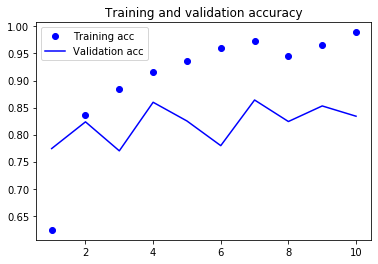

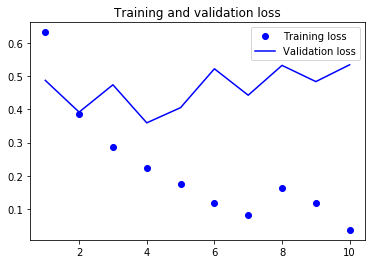

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

As a reminder, in chapter 3, the first naive approach to this dataset got you to a test
accuracy of 88%. Unfortunately, this small recurrent network doesn’t perform well
compared to this baseline (only 85% validation accuracy). Part of the problem is that
your inputs only consider the first 500 words, rather than full sequences—hence, the
RNN has access to less information than the earlier baseline model. The remainder of
the problem is that SimpleRNN isn’t good at processing long sequences, such as text.
Other types of recurrent layers perform much better. Let’s look at some moreadvanced layers. 